In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras


2021-09-11 20:42:14.696442: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-11 20:42:14.696462: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pathlib

#path of train datas
img_dir=r'../../datasets/objects2/data'
valid_dir = r'../../datasets/objects2/data'
test_dir = r'../../datasets/objects2/data'

#PATH object
data_path = pathlib.Path(img_dir)
valid_path = pathlib.Path(valid_dir)
test_path = pathlib.Path(test_dir)

#list of classes
data_list=os.listdir(img_dir)
print (data_list)

#count images
image_count = len(list(data_path.glob('*/*.jpg')))
valid_count = len(list(valid_path.glob('*/*.jpg')))
print(image_count)
print(valid_count)

['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']
808
808


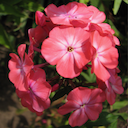

In [3]:
#examples of paint boll

paint_bolls = list(data_path.glob('flowers/*'))
PIL.Image.open(str(paint_bolls[0]))





In [4]:
#define some constant
BATCH_SIZE = 32
HEIGHT = 128
WIDTH = 128




In [5]:
#load train dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split= 0.2,
    subset="training",
    seed= 123,
    image_size= (HEIGHT, WIDTH),
    batch_size= BATCH_SIZE

)




Found 1803 files belonging to 7 classes.
Using 1443 files for training.


2021-09-11 20:42:20.123339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-11 20:42:20.123734: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-11 20:42:20.123791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-11 20:42:20.123838: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-11 20:42:20.123882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [6]:
#load validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path, #cat use 'valid_path'
    validation_split= 0.2,
    subset="validation",
    seed= 123,
    image_size= (HEIGHT, WIDTH),
    batch_size= BATCH_SIZE

)







Found 1803 files belonging to 7 classes.
Using 360 files for validation.


In [7]:
#load test dataset

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size= (HEIGHT, WIDTH),
    batch_size= BATCH_SIZE
    )




Found 1803 files belonging to 7 classes.


In [8]:
#find class names

class_names = train_ds.class_names
num_classes = len(class_names)
print(num_classes)
print(class_names)

7
['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']


2021-09-11 20:42:26.238962: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(32, 128, 128, 3)
(32,)


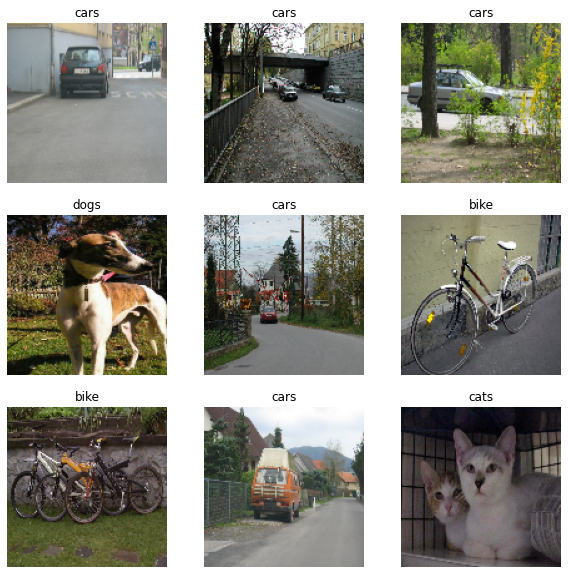

In [9]:
#visualize the data

plt.figure(figsize= (10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break





In [10]:

plt.figure(figsize= (10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break




In [11]:
#Standardize the data


#The RGB channel values are in the [0, 255] range.
#This is not ideal for a neural network; in general
#you should seek to make your input values small. Here,
#you will standardize values to be in the [0, 1] range by
#using a Rescaling layer



normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
print(normalization_layer)




In [19]:
#Create the model

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(HEIGHT, WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])


In [20]:
#compile the model

model.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics= ['accuracy']
    
)



In [21]:
#model summary :)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)       

In [22]:
#train the model

EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data= val_ds,
    epochs = EPOCHS


)



Epoch 1/10


2021-09-11 20:00:56.256175: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 33554432 exceeds 10% of free system memory.
2021-09-11 20:00:56.541241: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 16777216 exceeds 10% of free system memory.
2021-09-11 20:00:57.075963: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24772608 exceeds 10% of free system memory.
2021-09-11 20:00:57.129411: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 24772608 exceeds 10% of free system memory.
2021-09-11 20:00:57.399543: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 16777216 exceeds 10% of free system memory.


46/46 [==============================] - 15s 252ms/step - loss: 1.9176 - accuracy: 0.2266 - val_loss: 1.8990 - val_accuracy: 0.2611
Epoch 2/10
46/46 [==============================] - 9s 188ms/step - loss: 1.8877 - accuracy: 0.2911 - val_loss: 1.8697 - val_accuracy: 0.3278
Epoch 3/10
46/46 [==============================] - 8s 182ms/step - loss: 1.8530 - accuracy: 0.3285 - val_loss: 1.8291 - val_accuracy: 0.4056
Epoch 4/10
46/46 [==============================] - 8s 179ms/step - loss: 1.8159 - accuracy: 0.4109 - val_loss: 1.8190 - val_accuracy: 0.3861
Epoch 5/10
46/46 [==============================] - 8s 176ms/step - loss: 1.7914 - accuracy: 0.4089 - val_loss: 1.7752 - val_accuracy: 0.4167
Epoch 6/10
46/46 [==============================] - 8s 182ms/step - loss: 1.7774 - accuracy: 0.3915 - val_loss: 1.7598 - val_accuracy: 0.4028
Epoch 7/10
46/46 [==============================] - 8s 174ms/step - loss: 1.7371 - accuracy: 0.4193 - val_loss: 1.7432 - val_accuracy: 0.4083
Epoch 8/10
46/46

In [18]:
#visualize training results :))((

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: name 'history' is not defined

In [12]:
#Data augmentation
#takes the approach of generating additional
#training data from your existing examples by 
#augmenting them using random transformations 
#that yield believable-looking images


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(HEIGHT, 
                                                              WIDTH,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)






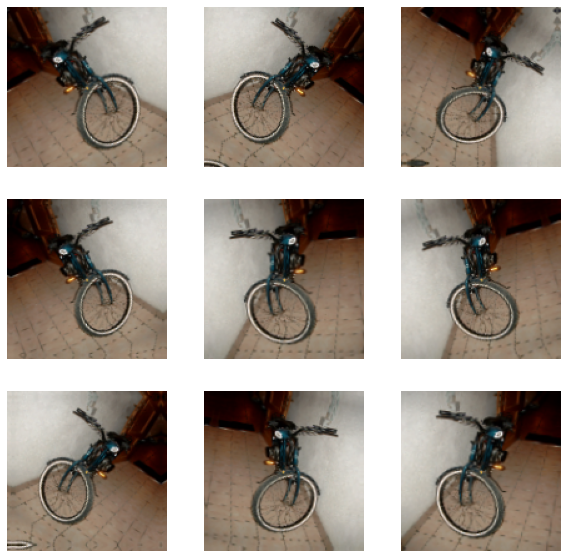

In [13]:

#let's visualize what a fwe augmented examples look 
#like by applying data ...

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [29]:
#Dropout
'''
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=1, strides=1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),


  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])'''

model = Sequential([
    data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(HEIGHT, WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes)
])


print(model)

In [30]:
#compile

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)       

In [31]:
#training

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)




Epoch 1/15
46/46 [==============================] - 10s 207ms/step - loss: 1.9182 - accuracy: 0.2051 - val_loss: 1.9044 - val_accuracy: 0.1861
Epoch 2/15
46/46 [==============================] - 9s 206ms/step - loss: 1.9063 - accuracy: 0.2086 - val_loss: 1.8993 - val_accuracy: 0.2611
Epoch 3/15
46/46 [==============================] - 10s 208ms/step - loss: 1.9032 - accuracy: 0.2259 - val_loss: 1.8954 - val_accuracy: 0.2611
Epoch 4/15
46/46 [==============================] - 9s 195ms/step - loss: 1.9011 - accuracy: 0.2259 - val_loss: 1.8920 - val_accuracy: 0.2611
Epoch 5/15
46/46 [==============================] - 9s 188ms/step - loss: 1.8998 - accuracy: 0.2259 - val_loss: 1.8902 - val_accuracy: 0.2611
Epoch 6/15
46/46 [==============================] - 9s 187ms/step - loss: 1.8983 - accuracy: 0.2259 - val_loss: 1.8883 - val_accuracy: 0.2611
Epoch 7/15
46/46 [==============================] - 9s 193ms/step - loss: 1.8977 - accuracy: 0.2259 - val_loss: 1.8870 - val_accuracy: 0.2611
Epoc

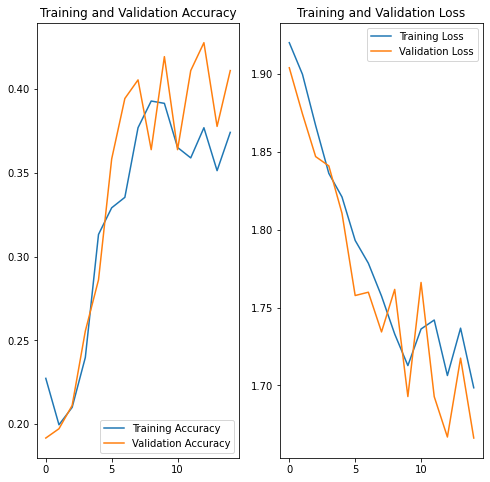

In [27]:
#Visualize training results 


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#######
[[[[ 63.625      80.875      80.5      ]
   [105.375     121.        148.125    ]
   [193.625     211.625     233.625    ]
   ...
   [203.75      214.25      231.375    ]
   [205.        213.625     231.375    ]
   [201.375     213.        229.75     ]]

  [[ 78.75       95.75       89.75     ]
   [188.125     203.125     232.125    ]
   [193.125     210.125     229.875    ]
   ...
   [202.        213.        231.       ]
   [200.875     211.875     229.875    ]
   [201.875     212.875     230.875    ]]

  [[ 68.125      82.25       81.875    ]
   [152.5       166.5       176.       ]
   [191.375     209.25      230.25     ]
   ...
   [201.        212.        230.       ]
   [202.875     210.875     229.875    ]
   [200.125     211.125     229.125    ]]

  ...

  [[151.875     153.875     152.875    ]
   [150.75      153.        152.       ]
   [149.        150.375     152.25     ]
   ...
   [133.125     138.        141.       ]
   [133.125     137.125     140.125    ]
   [134.

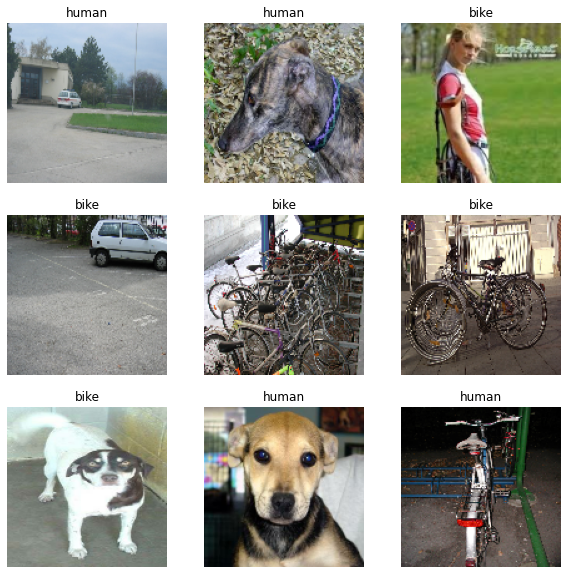

In [28]:
#predict test data



test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

#Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
print("#######")
print(image_batch)
print(label_batch)
print("#######")
#plt.imshow(image_batch[1].astype("uint8"))

predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 6)

for i in range(9):
    print(predictions[i])
    print(class_names[predictions[i]])

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")